In [1]:
__version__ = 20201206
__author__ = "Guillermo Damke <gdamke@gmail.com>"

# Astropy and Astropy Tables

## Astropy

"The Astropy Project is a *community effort* to develop a **common core package for Astronomy in Python** and **foster an ecosystem of interoperable astronomy packages.**

The Astropy community is committed to *supporting diversity and inclusion*.

Please remember to **acknowledge and cite the use of Astropy!**" (quote from www.astropy.org)

### Astropy packages

"The astropy package contains **key functionality and common tools needed for performing astronomy and astrophysics with Python**. It is at the **core of the Astropy Project**, which aims to enable the **community to develop** a robust ecosystem of **affiliated packages** covering a broad range of needs for **astronomical research, data processing, and data analysis**." (from astropy.org)

You can find the current core packages in: https://docs.astropy.org/en/stable/

For version 4.2, this list includes:

![Astropy packages](Images/Astropy_packages.png)

The *affiliated packages* are organized into:

* Astropy Affiliated Packages
* Astropy Coordinated Packages
* Astropy Infrastructure Packages



Visit the Astropy webpage for more details and also to learn about the list of packages at https://www.astropy.org/affiliated/

### Installing Astropy

The Anaconda Python Distribution *includes astropy and is the recommended way to install both Python and the astropy package*. Once you have Anaconda installed use the following to update to the latest version of astropy:

`conda update astropy`

If you instead *installed miniconda*, you can use the following to install astropy and its dependencies:

`conda install astropy`

To install astropy from source into a existing Python installation *without using Anaconda*, use the following:

`pip install astropy`

### Importing Astropy

You can import astropy and check the library version by doing:

In [2]:
import astropy

In [3]:
astropy.__version__

'4.2'

However, to import a specific subpackage, you have to do:

`from astropy import subpackage`

# Astropy's Data Tables


According to Astropy's documentation:

"`astropy.table` provides functionality for storing and manipulating heterogeneous tables of data in a way that is familiar to numpy users. A few notable capabilities of this package are:

* Initialize a table from a wide variety of input data structures and types.
* Modify a table by adding or removing *columns*, changing column names, or adding new rows of data.
* Handle tables containing *missing values*.
* Include table and *column metadata* as flexible data structures.
* Specify a *description, units, and output formatting for columns*.
* Interactively *scroll* through long tables similar to using more.
* Create a new table by *selecting rows or columns* from a table.
* Perform *Table Operations* like database *joins, concatenation, and binning*.
* Maintain a table index for fast retrieval of table items or ranges.
* Manipulate *multidimensional columns*.
* Handle *non-native (mixin) column types* within table.
* Methods for *Reading and Writing* Table Objects to files.
* Hooks for Subclassing Table and its component classes.


### Importing Tables:

In [4]:
from astropy import table as tbl # Personal choice
# Alternatively, can do:
from astropy.table import Table

### Creating a Table

There are multiple ways tocreate a table. We will review only some of them.





In [5]:
col1 = [1,2,3,4]
col2 = ["A","B","C","D"]

# Table will assume that you pass columns.
data = Table( data=[col1, col2])
data

col0,col1
int64,str1
1,A
2,B
3,C
4,D


See how Astropy infers the data type per column and how columns were assigned a name?

You can access the data by the column name:

In [6]:
data['col0']

1
2
3
4


To set the column names, use the `names` argument.

In [7]:
data = Table( data=[col1, col2], names=["number", "letters"])
data

number,letters
int64,str1
1,A
2,B
3,C
4,D


In [8]:
data.colnames

['number', 'letters']

In [9]:
# Or use the "rename_column" method:
if "number" in data.colnames: 
    data.rename_column("number", "numbers")
data

numbers,letters
int64,str1
1,A
2,B
3,C
4,D


In [10]:
clouds = [["LMC",17.5],["SMC",17.9]]

In [11]:
Table( rows=clouds, names=["Name","DM"])

Name,DM
str3,float64
LMC,17.5
SMC,17.9


In [12]:
data = tbl.Table.read("NGC.fits")

In [13]:
tbl.Table.read.help("fits")

Table.read(format='fits') documentation

Read a Table object from an FITS file

If the ``astropy_native`` argument is ``True``, then input FITS columns
which are representations of an astropy core object will be converted to
that class and stored in the ``Table`` as "mixin columns".  Currently this
is limited to FITS columns which adhere to the FITS Time standard, in which
case they will be converted to a `~astropy.time.Time` column in the output
table.

Parameters
----------
input : str or file-like object or compatible `astropy.io.fits` HDU object
    If a string, the filename to read the table from. If a file object, or
    a compatible HDU object, the object to extract the table from. The
    following `astropy.io.fits` HDU objects can be used as input:
    - :class:`~astropy.io.fits.hdu.table.TableHDU`
    - :class:`~astropy.io.fits.hdu.table.BinTableHDU`
    - :class:`~astropy.io.fits.hdu.table.GroupsHDU`
    - :class:`~astropy.io.fits.hdu.hdulist.HDUList`
hdu : int or str, optio

In [14]:
data

_RAJ2000,_DEJ2000,NGC,m_NGC,Type,RA1975,DE1975,Mag,r_Mag,_RA_icrs,_DE_icrs
deg,deg,,,,deg,deg,mag,,deg,deg
float64,float64,int16,bytes1,int16,float32,float32,float32,uint8,float64,float64
1.8227,27.7058,1,,5,1.50,27.57,13.5,2,1.8227,27.7058
1.8226,27.6724,2,,5,1.50,27.53,15.0,2,1.8226,27.6724
1.8211,8.2891,3,,5,1.50,8.15,14.5,2,1.8211,8.2891
2.0462,8.1558,4,,5,1.73,8.02,nan,0,2.0462,8.1558
1.9486,35.3557,5,,5,1.62,35.22,14.5,2,1.9486,35.3557
2.0735,32.5057,6,,7,1.75,32.37,nan,0,2.0735,32.5057
2.0928,-29.9108,7,,5,1.77,-30.05,13.0,3,2.0928,-29.9108
2.1977,23.8391,8,,5,1.88,23.70,15.0,3,2.1977,23.8391


In [15]:
tbl.unique(data, keys='Type')['Type']

0
1
2
3
4
5
6
7
18
19
25


Note on Type column:

The object type is coded as follows : 1 Open Cluster 6 Cluster associated with nebulosity 2 Globular Cluster 7 Non existent 3 Diffuse Nebula 8 Object in Large Magellanic Cloud 4 Planetary Nebula 9 Object in Small Magellanic Cloud 5 Galaxy 0 Unverified southern object
Combination of two type numbers may appear for an object (such as 28 for a Globular cluster in LMC, etc) 

### Adding columns to Tables

In [16]:
# Let's calculate Galactic Coordinates for the objects
from astropy import coordinates as coords

In [17]:
data_coords_icrs = coords.SkyCoord( data['_RA_icrs'], data['_DE_icrs'], frame='icrs')
data_coords_icrs

<SkyCoord (ICRS): (ra, dec) in deg
    [(1.82265028, 27.70576778), (1.82264722, 27.67243444),
     (1.82111778,  8.28913194), ..., (1.746095  ,  8.33913722),
     (1.74755056, 27.65577306), (1.77110972,  8.42246861)]>

In [18]:
data_coords_gal = data_coords_icrs.transform_to("galactic")
data_coords_gal

<SkyCoord (Galactic): (l, b) in deg
    [(111.11371714, -34.15083076), (111.10541808, -34.18344916),
     (104.58075811, -53.0021917 ), ..., (104.4861413 , -52.9331697 ),
     (111.0225882 , -34.18600583), (104.56471315, -52.86030046)]>

In [19]:
_l = tbl.Column( data=data_coords_gal.l, name='l')
_b = tbl.Column( data=data_coords_gal.b, name='b')

data.add_columns( [_l, _b])


In [20]:
data

_RAJ2000,_DEJ2000,NGC,m_NGC,Type,RA1975,DE1975,Mag,r_Mag,_RA_icrs,_DE_icrs,l,b
deg,deg,,,,deg,deg,mag,,deg,deg,deg,deg
float64,float64,int16,bytes1,int16,float32,float32,float32,uint8,float64,float64,float64,float64
1.8227,27.7058,1,,5,1.50,27.57,13.5,2,1.8227,27.7058,111.11371713900999,-34.15083076070411
1.8226,27.6724,2,,5,1.50,27.53,15.0,2,1.8226,27.6724,111.10541807696555,-34.1834491604687
1.8211,8.2891,3,,5,1.50,8.15,14.5,2,1.8211,8.2891,104.58075810713221,-53.00219169885081
2.0462,8.1558,4,,5,1.73,8.02,nan,0,2.0462,8.1558,104.87440552824798,-53.192749573678554
1.9486,35.3557,5,,5,1.62,35.22,14.5,2,1.9486,35.3557,112.98385482270103,-26.671524518697343
2.0735,32.5057,6,,7,1.75,32.37,nan,0,2.0735,32.5057,112.48569513851551,-29.489353166563088
2.0928,-29.9108,7,,5,1.77,-30.05,13.0,3,2.0928,-29.9108,14.011678609547388,-80.14383098673464
2.1977,23.8391,8,,5,1.88,23.70,15.0,3,2.1977,23.8391,110.53037209669421,-38.003521949359694


In [21]:
import matplotlib.pyplot as plt
import astropy.units as u

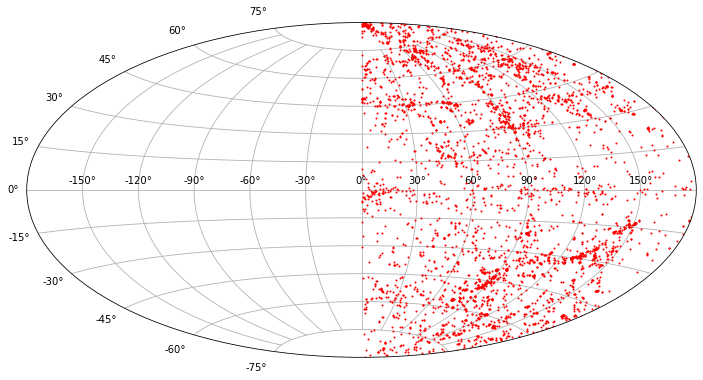

In [22]:
fig, ax = plt.subplots(1,1, figsize=(12,8), subplot_kw=dict(projection='aitoff'))
ax.plot( data['l'].to(u.radian), data['b'].to(u.radian), 'r.', ms=2)
ax.grid()

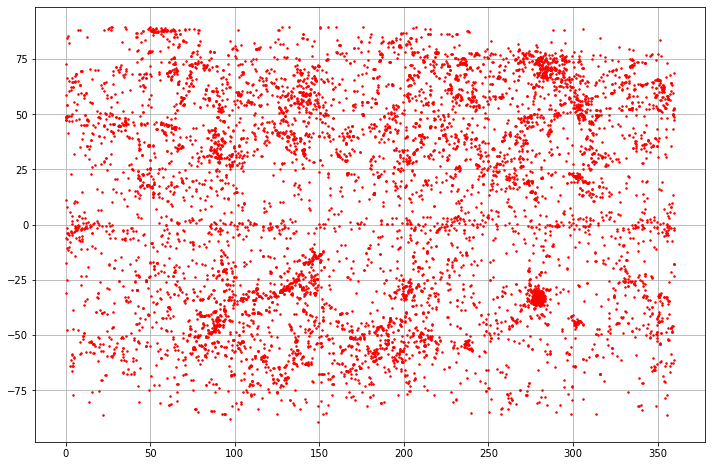

In [23]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
#ax.plot( np.unwrap( data['l'].to(u.radian), discont=np.pi*u.rad), data['b'].to(u.radian), 'r.', ms=3)
#ax.plot( data['l'].to(u.radian).value, data['b'].to(u.radian), 'r.', ms=3)
ax.plot( data['l'], data['b'], 'r.', ms=3)
ax.grid()

In [24]:
# Convert data between [pi,2pi] to [-pi,0]:
data['l'][data['l'] > 180] = data['l'][data['l'] > 180] - 360

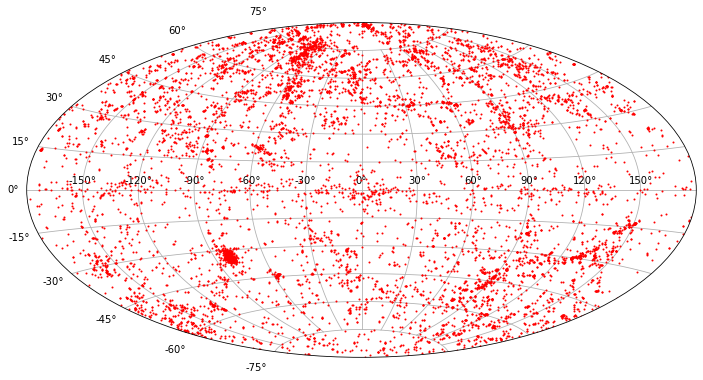

In [25]:
fig, ax = plt.subplots(1,1, figsize=(12,8), subplot_kw=dict(projection='aitoff'))
ax.plot( data['l'].to(u.radian), data['b'].to(u.radian), 'r.', ms=2)
ax.grid()

### Grouping and functions

How could we calculate statistics, group or plot some specific type of objects? 



In [26]:
data1 = data.copy()

data1.colnames

['_RAJ2000',
 '_DEJ2000',
 'NGC',
 'm_NGC',
 'Type',
 'RA1975',
 'DE1975',
 'Mag',
 'r_Mag',
 '_RA_icrs',
 '_DE_icrs',
 'l',
 'b']

In [27]:

#data1.remove_columns(["NGC","m_NGC", "r_Mag"])

grps = data1.group_by( "Type")
#grps.groups.aggregate(np.nanmean)

In [29]:
grps.groups[0]

_RAJ2000,_DEJ2000,NGC,m_NGC,Type,RA1975,DE1975,Mag,r_Mag,_RA_icrs,_DE_icrs,l,b
deg,deg,,,,deg,deg,mag,,deg,deg,deg,deg
float64,float64,int16,bytes1,int16,float32,float32,float32,uint8,float64,float64,float64,float64
3.6805,-60.3276,53,,0,3.38,-60.47,nan,0,3.6805,-60.3276,-48.90395997887498,-56.21482327132193
5.7069,-45.2781,98,,0,5.40,-45.42,nan,0,5.7069,-45.2781,-41.477412939369515,-70.97420109752706
10.8644,-50.1798,238,,0,10.57,-50.32,nan,0,10.8644,-50.1798,-53.810837031660355,-66.89792902103459
14.0763,-52.7815,312,,0,13.80,-52.92,nan,0,14.0763,-52.7815,-58.767225716910445,-64.33070285893216
14.2005,-52.9816,323,,0,13.93,-53.12,nan,0,14.2005,-52.9816,-58.91853365475487,-64.12741239502614
14.2754,-52.9149,328,,0,14.00,-53.05,nan,0,14.2754,-52.9149,-59.02942237929835,-64.19173801992225
15.1970,-53.2322,348,,0,14.93,-53.37,nan,0,15.1970,-53.2322,-60.24223016485411,-63.838417927211
15.7128,-65.5992,360,,0,15.48,-65.73,nan,0,15.7128,-65.5992,-58.9606172022514,-51.48712074427968


### Table stacking

Another useful operation is table stacking. In this case, you can stack tables horizontally and vertically.


In [30]:
t1 = grps.groups[1]
t2 = grps.groups[2]

In [32]:
t2

_RAJ2000,_DEJ2000,NGC,m_NGC,Type,RA1975,DE1975,Mag,r_Mag,_RA_icrs,_DE_icrs,l,b
deg,deg,,,,deg,deg,mag,,deg,deg,deg,deg
float64,float64,int16,bytes1,int16,float32,float32,float32,uint8,float64,float64,float64,float64
6.0262,-72.0781,104,,2,5.75,-72.22,4.5,6,6.0262,-72.0781,-54.10563227123504,-44.89258587994958
13.1548,-26.5977,288,,2,12.85,-26.73,9.0,6,13.1548,-26.5977,149.40340647873018,-89.40760368755124
15.5881,-70.8491,362,,2,15.38,-70.98,8.0,6,15.5881,-70.8491,-58.36220948063607,-46.25172107044961
48.0712,-55.2234,1261,,2,47.90,-55.32,9.5,6,48.0712,-55.2234,-89.45335387804266,-52.118635286966764
71.2313,-84.0063,1841,,2,72.18,-84.05,12.0,6,71.2313,-84.0063,-62.96953506899956,-30.14733343687939
78.5058,-40.0220,1851,,2,78.30,-40.05,7.5,6,78.5058,-40.0220,-115.51937461642015,-35.04951028788599
81.0577,-24.5280,1904,,2,80.80,-24.55,8.5,6,81.0577,-24.5280,-132.76223749221998,-29.341044839227557
91.8327,24.0960,2158,,2,91.45,24.10,12.0,6,91.8326,24.0960,-173.37491529579827,1.7632387102348086


In [33]:
tvstack = tbl.vstack( [t1, t2]) # A vertical stack:

In [34]:
tvstack

_RAJ2000,_DEJ2000,NGC,m_NGC,Type,RA1975,DE1975,Mag,r_Mag,_RA_icrs,_DE_icrs,l,b
deg,deg,,,,deg,deg,mag,,deg,deg,deg,deg
float64,float64,int16,bytes1,int16,float32,float32,float32,uint8,float64,float64,float64,float64
6.3227,61.3383,103,,1,5.97,61.20,11.0,5,6.3227,61.3383,119.80100207812534,-1.3743807756886839
6.8433,71.3882,110,,1,6.47,71.25,nan,0,6.8433,71.3882,120.9931535186209,8.60706727535317
7.4764,60.2213,129,,1,7.12,60.08,10.0,5,7.4764,60.2213,120.25873373580357,-2.538616115514546
7.7821,63.3546,133,,1,7.43,63.22,9.5,5,7.7821,63.3546,120.65716527313027,0.5725467875675735
7.8798,61.5212,136,,1,7.53,61.38,11.5,5,7.8798,61.5212,120.55919680143315,-1.2587551398564938
8.2593,63.2711,146,,1,7.90,63.13,9.5,5,8.2593,63.2711,120.86459068420109,0.4732039492100304
11.1104,85.3366,188,,1,10.48,85.20,9.5,5,11.1104,85.3366,122.77807146200094,22.466982514898856
9.6870,61.0539,189,,1,9.32,60.92,11.0,5,9.6870,61.0539,121.39633385276619,-1.7800337385375127


### Table join

In [36]:
ta = data['_RAJ2000','_DEJ2000','NGC','m_NGC','Type','RA1975','DE1975']
tb = data['_RAJ2000','_DEJ2000','Mag','r_Mag','_RA_icrs','_DE_icrs','l','b']


In [37]:
tc = tb[:100]


In [41]:
tc

_RAJ2000,_DEJ2000,Mag,r_Mag,_RA_icrs,_DE_icrs,l,b
deg,deg,mag,,deg,deg,deg,deg
float64,float64,float32,uint8,float64,float64,float64,float64
1.8227,27.7058,13.5,2,1.8227,27.7058,111.11371713900999,-34.15083076070411
1.8226,27.6724,15.0,2,1.8226,27.6724,111.10541807696555,-34.1834491604687
1.8211,8.2891,14.5,2,1.8211,8.2891,104.58075810713221,-53.00219169885081
2.0462,8.1558,nan,0,2.0462,8.1558,104.87440552824798,-53.192749573678554
1.9486,35.3557,14.5,2,1.9486,35.3557,112.98385482270103,-26.671524518697343
2.0735,32.5057,nan,0,2.0735,32.5057,112.48569513851551,-29.489353166563088
2.0928,-29.9108,13.0,3,2.0928,-29.9108,14.011678609547388,-80.14383098673464
2.1977,23.8391,15.0,3,2.1977,23.8391,110.53037209669421,-38.003521949359694


In [47]:
tjoin = tbl.join( ta, tc, keys=["_RAJ2000","_DEJ2000"], join_type='right')

In [44]:
tbl.join?

In [ ]:
tjoin.sort('NGC')

In [48]:
tjoin

_RAJ2000,_DEJ2000,NGC,m_NGC,Type,RA1975,DE1975,Mag,r_Mag,_RA_icrs,_DE_icrs,l,b
deg,deg,,,,deg,deg,mag,,deg,deg,deg,deg
float64,float64,int16,bytes1,int16,float32,float32,float32,uint8,float64,float64,float64,float64
1.8211,8.2891,3,,5,1.50,8.15,14.5,2,1.8211,8.2891,104.58075810713221,-53.00219169885081
1.8226,27.6724,2,,5,1.50,27.53,15.0,2,1.8226,27.6724,111.10541807696555,-34.1834491604687
1.8227,27.7058,1,,5,1.50,27.57,13.5,2,1.8227,27.7058,111.11371713900999,-34.15083076070411
1.9486,35.3557,5,,5,1.62,35.22,14.5,2,1.9486,35.3557,112.98385482270103,-26.671524518697343
2.0462,8.1558,4,,5,1.73,8.02,nan,0,2.0462,8.1558,104.87440552824798,-53.192749573678554
2.0735,32.5057,6,,7,1.75,32.37,nan,0,2.0735,32.5057,112.48569513851551,-29.489353166563088
2.0928,-29.9108,7,,5,1.77,-30.05,13.0,3,2.0928,-29.9108,14.011678609547388,-80.14383098673464
2.1673,-33.8775,10,,5,1.85,-34.02,nan,0,2.1673,-33.8775,-5.924363043708411,-78.59133827568976


### Saving the results:

To write a new table, use the `write` method.

In [50]:
tjoin.write("results.tex")